<a href="https://colab.research.google.com/github/whiskyching/DeepLearningFlappyBird/blob/master/Analysis%20Stock%20and%20predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21910700.0,323.339996
2020-06-03,326.200012,322.299988,324.660004,325.119995,26122800.0,325.119995
2020-06-04,325.619995,320.779999,324.390015,322.320007,21890100.0,322.320007
2020-06-05,331.750000,323.230011,323.350006,331.500000,34289200.0,331.500000


In [2]:
df.shape


(2624, 6)

In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)


Date
2020-05-22    290.919420
2020-05-26    291.165082
2020-05-27    291.357882
2020-05-28    291.581135
2020-05-29    291.777708
2020-06-01    292.027409
2020-06-02    292.244254
2020-06-03    292.414824
2020-06-04    292.550430
2020-06-05    292.711871
Name: Adj Close, dtype: float64

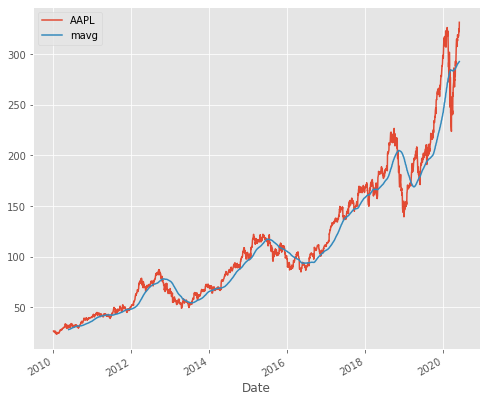

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()


In [5]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()


Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Adj Close, dtype: float64

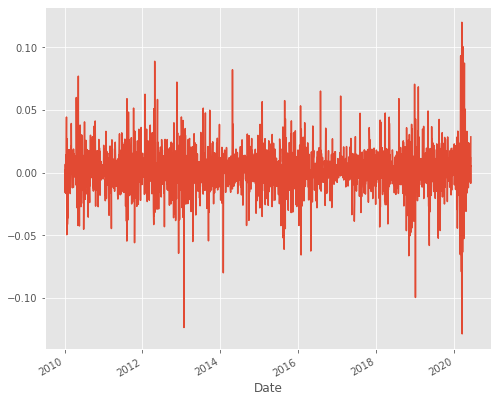

In [6]:
rets.plot(label='return')

In [7]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2020-06-01,321.850006,6.76,1431.819946,124.889999,182.830002
2020-06-02,323.339996,7.05,1439.219971,126.000000,184.910004
2020-06-03,325.119995,7.36,1436.380005,129.050003,185.360001
2020-06-04,322.320007,7.74,1412.180054,128.889999,182.919998
2020-06-05,331.500000,7.88,1438.390015,132.059998,187.199997


In [8]:
dfcomp.shape


(2624, 5)

In [9]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr


Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.390105,0.529922,0.463407,0.544423
GE,0.390105,1.000000,0.382106,0.504446,0.422524
GOOG,0.529922,0.382106,1.000000,0.472719,0.602560
IBM,0.463407,0.504446,0.472719,1.000000,0.555498
MSFT,0.544423,0.422524,0.602560,0.555498,1.000000


Text(0, 0.5, 'Returns GE')

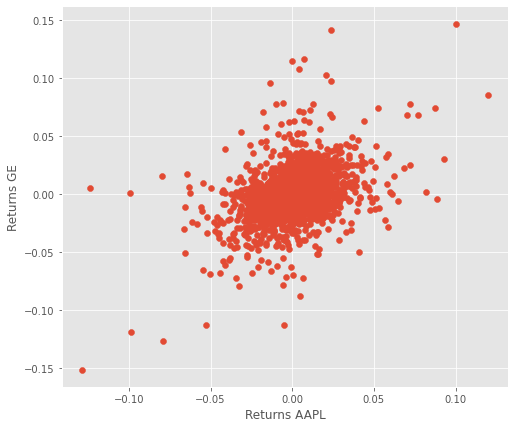

In [10]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')


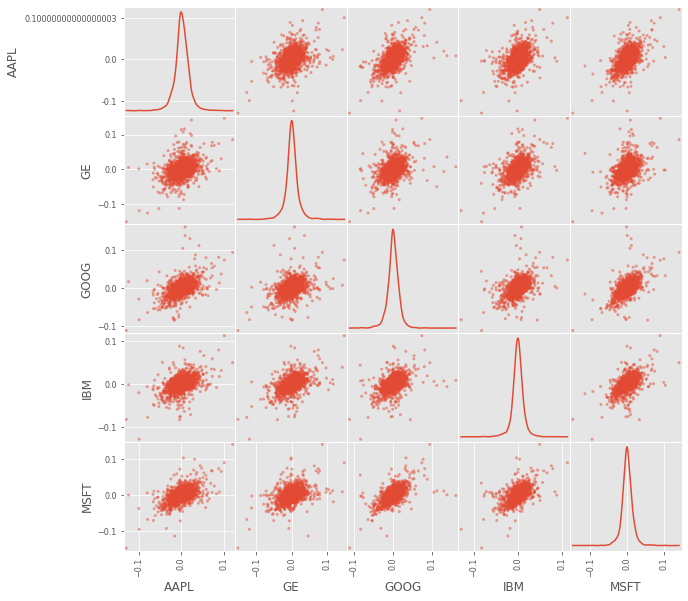

In [15]:


pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));


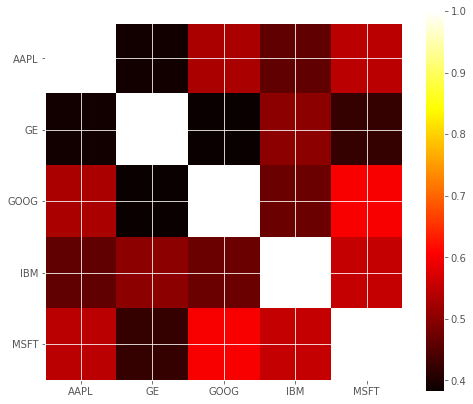

In [16]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

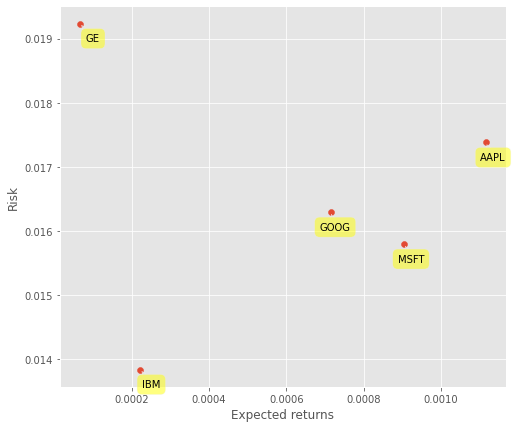

In [17]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In [18]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.215786


In [19]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.466835,123432400.0,0.990606,0.271752
2010-01-05,26.512596,150476200.0,1.091520,-0.102519
2010-01-06,26.090879,138040000.0,2.123523,-1.590633
2010-01-07,26.042646,119282800.0,1.400893,-0.552538
2010-01-08,26.215786,111902700.0,1.386924,0.798864


In [27]:

import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
import sklearn.model_selection as sklearn_model_selection

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)


(2624, 5)
Dimension of X (2597, 4)
Dimension of y (2597,)


In [0]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = sklearn_model_selection.train_test_split(X, y, test_size=0.2)

 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [31]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)


The linear regression confidence is  0.9586927036986812
The quadratic regression 2 confidence is  0.9592402918630193
The quadratic regression 3 confidence is  0.9631514550841138
The knn regression confidence is  0.9504445858609831


In [35]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

[292.27278722 298.01684494 294.6241401  298.04078659 302.23226521
 304.99557591 308.02124074 315.486624   320.96256074 317.92590485
 314.65660917 315.16567304 312.97079627 320.53621701 319.08314272
 324.24086235 322.67582218 324.29380413 323.31866462 323.7331948
 324.23491958 323.25203207 327.4859931  328.89080331 330.55241523
 328.2557334  337.17353469] 0.9586927036986812 27


In [0]:

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]


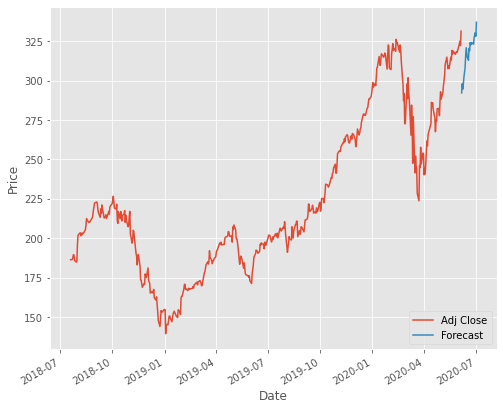

In [37]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()